In [1]:
#Dependencies
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

#Accessing csv file
data_file = "billboard_top_100_by_decade.csv"
top_100 = pd.read_csv(data_file)
top_100.head(5)

,song,performer,count,decade
0,Radioactive,Imagine Dragons,87,2010
1,Sail,AWOLNATION,79,2010
2,Counting Stars,OneRepublic,68,2010
3,Party Rock Anthem,LMFAO Featuring Lauren Bennett & GoonRock,68,2010
4,Rolling In The Deep,Adele,65,2010


In [13]:
#Sorting values by year and count to later grab top values
top_100_sorted = top_100.sort_values(by=["decade", "count"], ascending=False)
top_100_sorted.head(15)

,song,performer,count,decade
0,Radioactive,Imagine Dragons,87,2010
1,Sail,AWOLNATION,79,2010
2,Counting Stars,OneRepublic,68,2010
3,Party Rock Anthem,LMFAO Featuring Lauren Bennett & GoonRock,68,2010
4,Rolling In The Deep,Adele,65,2010
5,Ho Hey,The Lumineers,62,2010
6,Demons,Imagine Dragons,61,2010
7,Somebody That I Used To Know,Gotye Featuring Kimbra,59,2010
8,All Of Me,John Legend,59,2010
9,Shape Of You,Ed Sheeran,58,2010


In [26]:
top_1980 = top_100_sorted.loc[top_100_sorted["decade"]==1980,:]
d1 = top_1980.head(5)

In [71]:
top_1990 = top_100_sorted.loc[top_100_sorted["decade"]==1990,:]
d2 = top_1990.head(5)
top_2000 = top_100_sorted.loc[top_100_sorted["decade"]==2000,:]
d3 = top_2000.head(5)
top_2010 = top_100_sorted.loc[top_100_sorted["decade"]==2010,:]
d4 = top_2010.head(5)
d1_d2 = d1.append(d2)
d1_d3 = d1_d2.append(d3)
top_by_decade = d1_d3.append(d4)
#top_by_decade.head(50)
top_by_decade = top_by_decade[["decade", "performer", "song", "count"]]
top_by_decade.rename(columns = ({"decade":"Decade", "song":"Song",
                         "performer":"Performer", "count":"Count"}), inplace=True)
top_by_decade.head(2)

,Decade,Performer,Song,Count
300,1980,Soft Cell,Tainted Love,43
301,1980,Moving Pictures,What About Me,43


In [72]:
top_by_decade.head(50)

,Decade,Performer,Song,Count
300,1980,Soft Cell,Tainted Love,43
301,1980,Moving Pictures,What About Me,43
302,1980,The Pointer Sisters,I'm So Excited,40
303,1980,UB40,Red Red Wine,40
304,1980,Benny Mardones,Into The Night,37
200,1990,LeAnn Rimes,How Do I Live,69
201,1990,Jewel,Foolish Games/You Were Meant For Me,65
202,1990,Los Del Rio,Macarena (Bayside Boys Mix),60
203,1990,Paula Cole,I Don't Want To Wait,56
204,1990,Duncan Sheik,Barely Breathing,55


In [66]:
top_df = top_by_decade.groupby("Decade").agg({"Count":["sum","mean"]})
top_df.columns = top_df.columns.map("_".join)
top_df.rename(columns = ({"Count_sum":"Total Count", "Count_mean":"Total Avg."}),
             inplace=True)
top_df.head()

,Total Count,Total Avg.
Decade,,
1980,203,40.6
1990,305,61.0
2000,316,63.2
2010,367,73.4


<IPython.core.display.Javascript object>


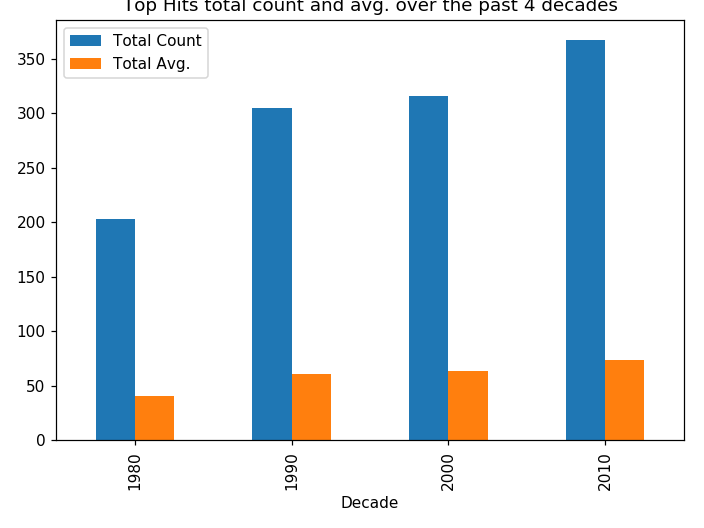

In [70]:
top_df[["Total Count","Total Avg."]].plot(kind="bar")
plt.tight_layout()
plt.title("Top Hits total count and avg. over the past 4 decades")
plt.show()
plt.savefig("Top hits by decade")